# Playground for exploring what gradient decent looks like on a 2D plane

##### Heavily influenced by https://lucidar.me/en/neural-networks/gradient-descent-example/

# Find the minima of a simple function:

In [1]:

import numpy as np

# Function to minimize
def function ( XY ):
   return (XY[0]-2)**2 + 2*(XY[1]-3)**2

# Gradient of the function
def gradient (XY):
    return np.array([ 2*XY[0]-4 , 4*XY[1]-12 ])

# Numerical gradient
def numerical_gradient (XY, fn, delta):
    deltax = np.array([delta,0])
    deltay = np.array([0,delta])
    X_plus  = fn( XY + deltax)
    X_minus = fn( XY - deltax)
    Y_plus  = fn( XY + deltay)
    Y_minus = fn( XY - deltay)
    return np.array ([ X_plus - X_minus, Y_plus - Y_minus])
    

# Starting point
XY = np.array([30,20])

# Step size multiplier
alpha=0.5

# Gradient descent (200 steps)
for x in range(0, 200):
    XY = XY - alpha*numerical_gradient(XY,function,0.05)
    #print (XY)

# Print results
print ('XY=', XY)
print ('f=', function(XY))

# Output expected:
# XY= [2.00000002 3.        ]
# f= 3.9022927947211357e-16

XY= [2.00000002 3.        ]
f= 3.9022927947211357e-16


# Plot the 2D plane of a simple function

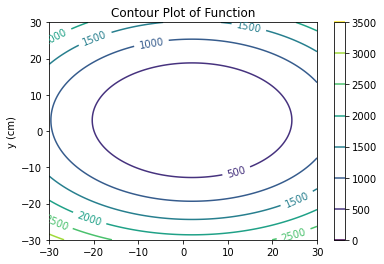

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def DrawFunction( fn ):
    xlist = np.linspace(-30., 30., 300)
    ylist = np.linspace(-30., 30., 300)
    X, Y = np.meshgrid(xlist, ylist)
    Z = fn(np.array([X, Y]))
    fig,ax=plt.subplots(1,1)
    cp = ax.contour(X, Y, Z)
    fig.colorbar(cp) # Add a colorbar to a plot
    ax.clabel(cp, inline=True, fontsize=10)
    ax.set_title('Contour Plot of Function')
    #ax.set_xlabel('x (cm)')
    ax.set_ylabel('y (cm)')
    return fig, cp

myFig, ContourPlot = DrawFunction(function)
myFig.show()

# Plot the path of decent for a simple function

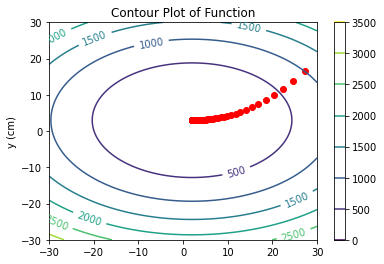

In [3]:
fig, cp = DrawFunction(function)

# Starting point
XY = np.array([30,20])

# Step size multiplier
alpha=0.5

# Number of steps to take
steps = 200

# Gradient descent (200 steps)
XYHistory = np.zeros( (steps,2 ))
for x in range(0, 200):
    XY = XY - alpha*numerical_gradient(XY,function,0.05)
    XYHistory[x] = XY
    #print (XY)

#print (XYHistory)

plt.scatter(XYHistory[:,0], XYHistory[:,1], color='r')
plt.show()

In [4]:
# Define and draw a c

(<Figure size 432x288 with 2 Axes>,
 <matplotlib.contour.QuadContourSet at 0x14a592138fa0>)

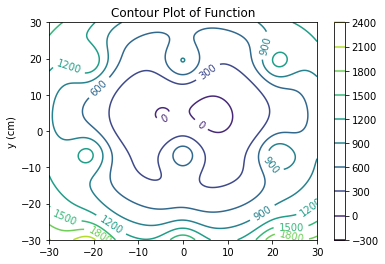

In [4]:
# Function to minimize
def function2 ( XY ):
   #return (XY[0]-2)**2 + 2*(XY[1]-3)**2#
   #return -1000 - (XY[0]+10)**2 + 2*(XY[1]+15)**2
   #return (XY[0]-2)**2 + (XY[1]-3)**2 + (10*np.sin(XY[0])+5)**2
   return 100*np.exp(np.cos(0.30*XY[0]) -np.sin(0.25*XY[1]))-100 +(XY[0]-2)**2 + 1*(XY[1]-3)**2

DrawFunction(function2)

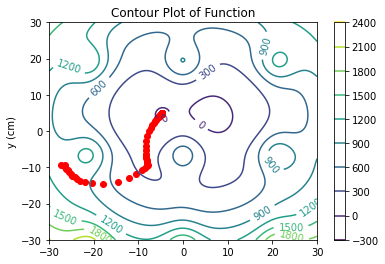

XY= [-4.7286757   4.90980972]
f= 52.56982302035789


In [5]:
DrawFunction(function2)

# Starting point
XY = np.array([-30,-10])

# Step size multiplier
alpha=0.5

# Number of steps to take
steps = 200

# Gradient descent (200 steps)
XYHistory = np.zeros( (steps,2 ))
for x in range(0, steps):
    XY = XY - alpha*numerical_gradient(XY,function2,0.05)
    XYHistory[x] = XY
    #print (XY)

#print (XYHistory)

plt.scatter(XYHistory[:,0], XYHistory[:,1], color='r')
plt.show()


# Print results
print ('XY=', XY)
print ('f=', function(XY))
